# Case Study: E-commerce Marketing and Sales Analysis

## Introduction:
This case study analyzes the marketing and sales performance of an e-commerce business using transactional, customer, discount, tax, and marketing spend data.
The primary objective is to understand customer acquisition, retention behavior, revenue drivers, marketing effectiveness, and product performance across different time periods.

By answering key business questions, the analysis aims to uncover actionable insights that can help the company improve customer retention, optimize marketing spend, enhance revenue growth, and make informed decisions related to inventory and promotions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Preparation

Multiple datasets were used for this analysis, including customer details, online sales transactions, discount coupons, marketing spend, and tax information.

The data preparation process involved:

Loading all datasets and reviewing their structure and data types

Converting date columns into a consistent datetime format to support time-based analysis

Handling missing values, especially in discount and tax-related fields

Merging datasets using appropriate keys such as transaction date, product category, and customer identifiers

Calculating derived metrics such as invoice value, monthly revenue, retention rates, and return on marketing investment (ROI)

These steps ensured the data was clean, consistent, and suitable for answering the business questions reliably.

**Load and Inspect Data:**

In [2]:
BASE_DIR = os.path.dirname(os.getcwd())
DATA_PATH = os.path.join(BASE_DIR, "Datasets")

Discount_Coupon = pd.read_csv(os.path.join(DATA_PATH, "Discount_Coupon.csv"))
Marketing_Spend = pd.read_csv(os.path.join(DATA_PATH, "Marketing_Spend.csv"))
Online_Sales = pd.read_csv(os.path.join(DATA_PATH, "Online_Sales.csv"))
CustomersData = pd.read_excel(os.path.join(DATA_PATH, "CustomersData.xlsx"))
Tax_amount = pd.read_excel(os.path.join(DATA_PATH, "Tax_amount.xlsx"))

In [3]:
datasets = {
    "CustomersData": CustomersData,
    "Discount_Coupon": Discount_Coupon,
    "Marketing_Spend": Marketing_Spend,
    "Online_Sales": Online_Sales,
    "Tax_amount": Tax_amount
}

for name, df in datasets.items():
    print(f"\n{name.upper()}")
    print(df.shape)
    display(df.head())


CUSTOMERSDATA
(1468, 4)


,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49



DISCOUNT_COUPON
(204, 4)


,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20



MARKETING_SPEND
(365, 3)


,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30



ONLINE_SALES
(52924, 10)


,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used



TAX_AMOUNT
(20, 2)


,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [4]:
Discount_Coupon.info()
Discount_Coupon.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


Month               0
Product_Category    0
Coupon_Code         0
Discount_pct        0
dtype: int64

In [5]:
Marketing_Spend.info()
Marketing_Spend.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


Date             0
Offline_Spend    0
Online_Spend     0
dtype: int64

In [6]:
Online_Sales.info()
Online_Sales.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


CustomerID             0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
dtype: int64

In [7]:
CustomersData.info()
CustomersData.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


CustomerID       0
Gender           0
Location         0
Tenure_Months    0
dtype: int64

In [8]:
Tax_amount.info()
Tax_amount.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 452.0+ bytes


Product_Category    0
GST                 0
dtype: int64

In [9]:
plt.style.use("default")   # stable across runs
sns.set_theme(style="whitegrid")

In [10]:
#Convert dates properly
Online_Sales['Transaction_Date'] = pd.to_datetime(Online_Sales['Transaction_Date'])
Marketing_Spend["Date"] = pd.to_datetime(Marketing_Spend["Date"])

In [11]:
#Id's as string
Online_Sales["CustomerID"] = Online_Sales["CustomerID"].astype(str)
CustomersData["CustomerID"] = CustomersData["CustomerID"].astype(str)

In [12]:
#Prevent NaN Joins
for df in [Online_Sales, Discount_Coupon, Tax_amount]:
    df["Product_Category"] = (
        df["Product_Category"]
        .str.strip()
        .str.lower()
    )

Discount_Coupon["Month"] = Discount_Coupon["Month"].str.strip().str.lower()


In [13]:
# Online_Sales Month (already from date)
Online_Sales['Month'] = pd.to_datetime(
    Online_Sales['Transaction_Date']
).dt.to_period('M')

# Discount_Coupon Month (convert Jan/Feb → period)
Discount_Coupon['Month'] = pd.to_datetime(
    Discount_Coupon['Month'],
    format='%b'
).dt.to_period('M')

In [14]:
#Extract Month
Online_Sales["Month"] = Online_Sales["Transaction_Date"].dt.to_period("M")
Marketing_Spend["Month"] = Marketing_Spend["Date"].dt.to_period("M")

**Prepare Discount % and Merge discount:**

In [15]:
#discount percentage
Discount_Coupon['Discount_pct'] = Discount_Coupon['Discount_pct'] / 100

In [16]:
#Merge discount into sales
Online_Sales = Online_Sales.merge(Discount_Coupon, on=['Month', 'Product_Category'], how='left')

Online_Sales.loc[Online_Sales["Coupon_Status"] == "Not Used", "Discount_pct"] = 0
Online_Sales["Discount_pct"] = Online_Sales["Discount_pct"].fillna(0)

**Merge GST:**

In [17]:
#Merge GST
Online_Sales = Online_Sales.merge(
    Tax_amount,
    on="Product_Category",
    how="left"
)

**Calculate Invoice Value:**

In [18]:
#Invoice Value
Online_Sales["Invoice_Value"] = (
    (Online_Sales["Quantity"] * Online_Sales["Avg_Price"]) *
    (1 - Online_Sales["Discount_pct"]) *
    (1 + Online_Sales["GST"]) +
    Online_Sales["Delivery_Charges"]
)

**Merge Customer data :**

In [19]:
#Merge Customer Data
Online_Sales = Online_Sales.merge(CustomersData, on="CustomerID", how="left")

## Business Questions

**1.Identify the months with the highest and lowest customer acquisition count. What strategies could be implemented to address the fluctuations and ensure consistent growth throughout the year?**

In [20]:
#Customer Acquisition by Month
first_purchase = (
    Online_Sales.groupby('CustomerID')['Transaction_Date']
    .min()
    .reset_index()
)

first_purchase['Acq_Month'] = first_purchase['Transaction_Date'].dt.to_period('M')

acquisition = first_purchase.groupby('Acq_Month')['CustomerID'].nunique()
acquisition


Acq_Month
2019-01    215
2019-02     96
2019-03    177
2019-04    163
2019-05    112
2019-06    137
2019-07     94
2019-08    135
2019-09     78
2019-10     87
2019-11     68
2019-12    106
Freq: M, Name: CustomerID, dtype: int64

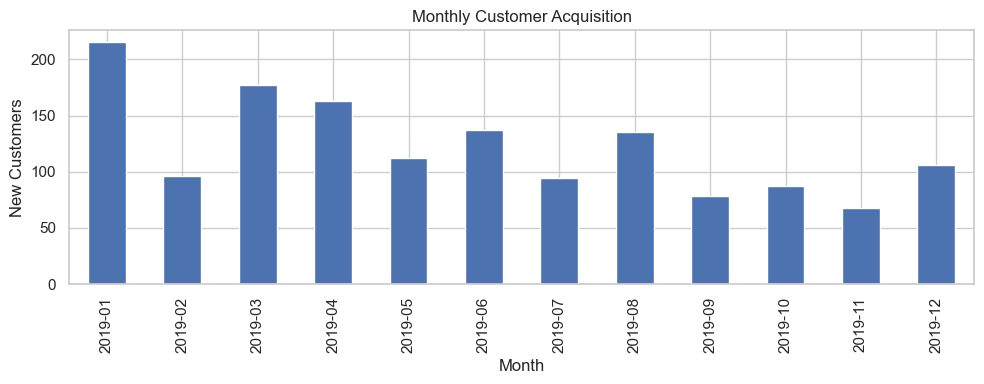

In [21]:
#vizual representation of acquisition
plt.figure(figsize=(10,4))
acquisition.plot(kind="bar")
plt.title("Monthly Customer Acquisition")
plt.ylabel("New Customers")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

**2. Analyze the data to determine if certain months consistently show higher or lower acquisition. How can the company capitalize on high-performing months and improve performance during slower periods?**

In [22]:
#Retention Rate (Month → Next Month)
#acquisition.sort_values()

monthly_customers = Online_Sales.groupby("Month")["CustomerID"].apply(set)

months = monthly_customers.index
retention_rate = []

for i in range(len(months)-1):
    curr = monthly_customers.iloc[i]
    nxt = monthly_customers.iloc[i+1]
    retention_rate.append(len(curr & nxt) / len(curr))

retention_df = pd.DataFrame({
    "Month": months[:-1],
    "Retention_Rate": retention_rate
})
retention_df["Retention_Rate_%"] = retention_df["Retention_Rate"] * 100
retention_df

,Month,Retention_Rate,Retention_Rate_%
0,2019-01,0.060465,6.046512
1,2019-02,0.100917,10.091743
2,2019-03,0.115385,11.538462
3,2019-04,0.111607,11.160714
4,2019-05,0.185000,18.500000
5,2019-06,0.223938,22.393822
6,2019-07,0.275424,27.542373
7,2019-08,0.146667,14.666667
8,2019-09,0.150259,15.025907
9,2019-10,0.147619,14.761905


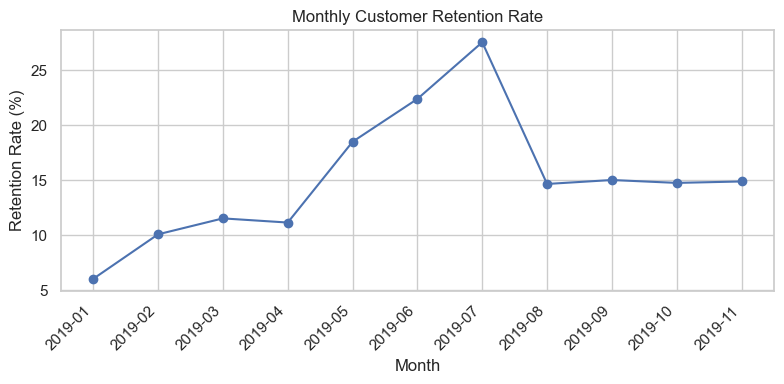

In [23]:
#visual representation of Higher & Lower retention rates
plt.figure(figsize=(8,4))
plt.plot(
    retention_df["Month"].astype(str),
    retention_df["Retention_Rate"] * 100,
    marker="o"
)
plt.ylabel("Retention Rate (%)")
plt.xlabel("Month")
plt.title("Monthly Customer Retention Rate")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**3. Identify periods with the strongest and weakest retention rates. What strategies could be implemented to improve retention during weaker months?**

In [24]:
#Revenue: New vs Existing Customers
#create monthly customer sets
monthly_customers = (
    Online_Sales
    .groupby("Month")["CustomerID"]
    .apply(set)
)
#Month → Next Month retention
months = monthly_customers.index
retention_rate = []

for i in range(len(months) - 1):
    curr = monthly_customers.iloc[i]
    nxt = monthly_customers.iloc[i + 1]
    retention_rate.append(len(curr & nxt) / len(curr))

retention_df = pd.DataFrame({
    "Month": months[:-1],
    "Retention_Rate": retention_rate
})

strongest = retention_df.loc[retention_df["Retention_Rate"].idxmax()]
weakest = retention_df.loc[retention_df["Retention_Rate"].idxmin()]

print("Strongest retentation rate")
print(strongest)
print("Weakest retentation rate")
print(weakest)


Strongest retentation rate
Month              2019-07
Retention_Rate    0.275424
Name: 6, dtype: object
Weakest retentation rate
Month              2019-01
Retention_Rate    0.060465
Name: 0, dtype: object


**4. Analyze customer behavior during high-retention months and suggest ways to replicate this success throughout the year.**

In [25]:
#High Retention Month
high_retention_months = retention_df.loc[
    retention_df["Retention_Rate"] >= retention_df["Retention_Rate"].quantile(0.75),
    "Month"
]

#Split Hight and other retention months
high_retention_data = Online_Sales[
    Online_Sales["Month"].isin(high_retention_months)
]

other_months_data = Online_Sales[
    ~Online_Sales["Month"].isin(high_retention_months)
]

#compare
behavior_comparison = pd.DataFrame({
    "High Retention Months": [
        high_retention_data["Invoice_Value"].mean(),
        (high_retention_data["Discount_pct"] > 0).mean(),
        high_retention_data["Quantity"].mean()
    ],
    "Other Months": [
        other_months_data["Invoice_Value"].mean(),
        (other_months_data["Discount_pct"] > 0).mean(),
        other_months_data["Quantity"].mean()
    ]
},
index=[
    "Avg Invoice Value",
    "Discount Usage Rate",
    "Avg Quantity per Order"
])

behavior_comparison

,High Retention Months,Other Months
Avg Invoice Value,89.117526,115.474904
Discount Usage Rate,0.000000,0.000000
Avg Quantity per Order,4.511416,4.492675


**5. Compare the revenue generated by new and existing customers month-over-month. What does this trend suggest about the balance between acquisition and retention efforts?**

In [26]:
#Sort Data
Online_Sales = Online_Sales.sort_values("Transaction_Date")

#Identify new vs existing customers (rolling logic)
Online_Sales["Is_New"] = ~Online_Sales["CustomerID"].duplicated()

#Aggregate revenue by Month & customer type
rev_split = (
    Online_Sales
    .groupby(["Month", "Is_New"])["Invoice_Value"]
    .sum()
    .reset_index()
)

#Reshape
rev_pivot = rev_split.pivot(
    index="Month",
    columns="Is_New",
    values="Invoice_Value"
).fillna(0)

rev_pivot.columns = ["Existing_Customer_Revenue", "New_Customer_Revenue"]
rev_pivot

,Existing_Customer_Revenue,New_Customer_Revenue
Month,,
2019-01,482326.9379,26187.8172
2019-02,386200.8268,10664.8302
2019-03,433182.1269,20022.9404
2019-04,475371.6857,17188.0212
2019-05,378476.7937,8302.5017
2019-06,384157.7016,12845.2323
2019-07,455121.5941,10167.4248
2019-08,496521.8299,10414.7801
2019-09,431770.7436,9051.6822


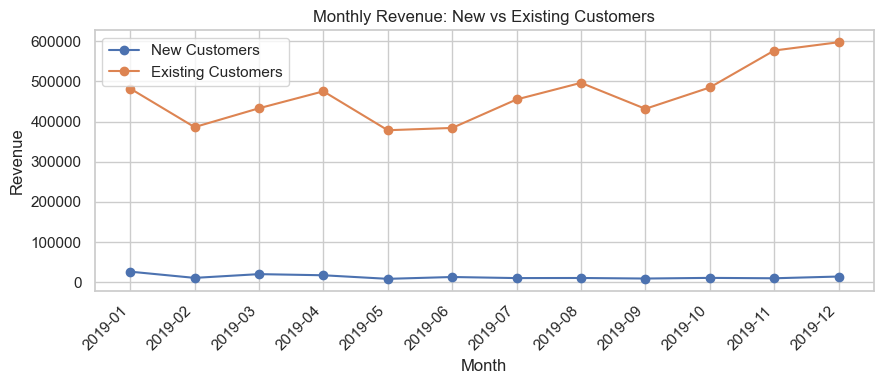

In [27]:
#Visualize New vs Existing Revenue
plt.figure(figsize=(9,4))

plt.plot(
    rev_pivot.index.astype(str),
    rev_pivot["New_Customer_Revenue"],
    marker="o",
    label="New Customers"
)

plt.plot(
    rev_pivot.index.astype(str),
    rev_pivot["Existing_Customer_Revenue"],
    marker="o",
    label="Existing Customers"
)

plt.title("Monthly Revenue: New vs Existing Customers")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**6. Analyze the relationship between coupon usage and revenue generation. How can discount strategies be optimized to maximize revenue while maintaining profitability?**

In [28]:
Online_Sales["Coupon_Flag"] = np.where(
    Online_Sales["Coupon_Status"].isin(["Used", "Clicked"]),
    "Coupon Used",
    "No Coupon"
)

coupon_revenue = (
    Online_Sales
    .groupby("Coupon_Flag")["Invoice_Value"]
    .sum()
    .reset_index()
)

print(coupon_revenue)
print("Comparing Average Transaction Value")
avg_invoice = (
    Online_Sales
    .groupby("Coupon_Flag")["Invoice_Value"]
    .mean()
    .reset_index()
)

print(avg_invoice)

   Coupon_Flag  Invoice_Value
0  Coupon Used   4.844651e+06
1    No Coupon   8.973176e+05
Comparing Average Transaction Value
   Coupon_Flag  Invoice_Value
0  Coupon Used     108.067169
1    No Coupon     110.862076


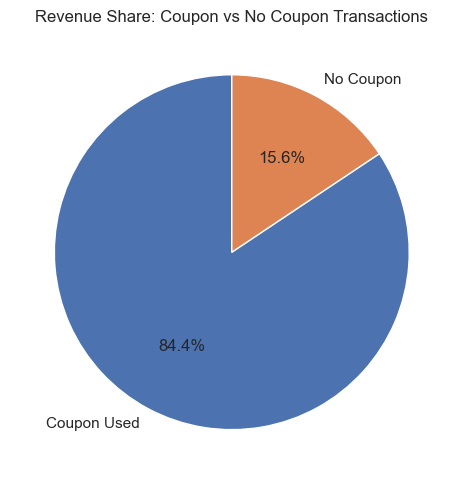

In [29]:
#Revenue share visualization
plt.figure(figsize=(5,5))

plt.pie(
    coupon_revenue["Invoice_Value"],
    labels=coupon_revenue["Coupon_Flag"],
    autopct="%.1f%%",
    startangle=90
)

plt.title("Revenue Share: Coupon vs No Coupon Transactions")
plt.tight_layout()
plt.show()

**7. Identify the top-performing products and analyze the factors driving their success. How can this insight inform inventory management and promotional strategies?**

In [30]:
#two success metrics - Total Quantity sold and Total Revenue
product_performance = (
    Online_Sales
    .groupby(
        ["Product_Description", "Product_Category"],
        as_index=False
    )
    .agg(
        Total_Quantity=("Quantity", "sum"),
        Total_Revenue=("Invoice_Value", "sum")
    )
)

#top 10 performing by revenue and quantity sold
top_by_revenue = (
    product_performance
    .sort_values("Total_Revenue", ascending=False)
    .head(10)
)

top_by_quantity = (
    product_performance
    .sort_values("Total_Quantity", ascending=False)
    .head(10)
)

top_products = pd.merge(
    top_by_revenue,
    top_by_quantity,
    on=["Product_Description", "Product_Category"],
    how = "inner"
)


success_factors = (
    Online_Sales[
        Online_Sales["Product_Description"]
        .isin(top_products["Product_Description"])
    ]
    .groupby("Product_Description")
    .agg(
        Avg_Discount=("Discount_pct", "mean"),
        Avg_Quantity_Per_Order=("Quantity", "mean"),
        Avg_Invoice_Value=("Invoice_Value", "mean")
    )
    .reset_index()
)

top_products, success_factors

(                      Product_Description Product_Category  Total_Quantity_x  \
 0  Nest Cam Outdoor Security Camera - USA         nest-usa              5206   
 
    Total_Revenue_x  Total_Quantity_y  Total_Revenue_y  
 0       717295.922              5206       717295.922  ,
                       Product_Description  Avg_Discount  \
 0  Nest Cam Outdoor Security Camera - USA           0.0   
 
    Avg_Quantity_Per_Order  Avg_Invoice_Value  
 0                1.564303          215.53363  )

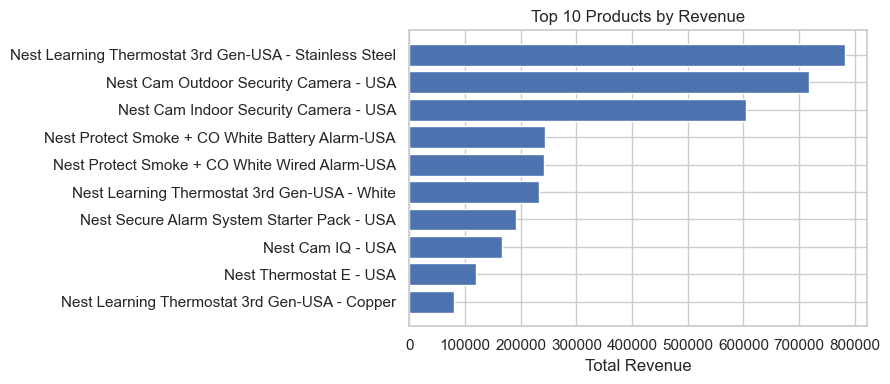

In [31]:
#Visual representation of 10 top performing products
plt.figure(figsize=(9,4))

plt.barh(
    top_by_revenue["Product_Description"],
    top_by_revenue["Total_Revenue"]
)

plt.xlabel("Total Revenue")
plt.title("Top 10 Products by Revenue")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**8. Analyze the relationship between monthly marketing spend and revenue. Are there any months where marketing efforts yielded disproportionately high or low returns? How can marketing strategies be adjusted to improve ROI?**

In [32]:
#Prepare marketing spend (monthly)
Marketing_Spend["Total_Marketing_Spend"] = (
    Marketing_Spend["Online_Spend"] + Marketing_Spend["Offline_Spend"]
)
monthly_marketing = (
    Marketing_Spend
    .groupby("Month", as_index=False)["Total_Marketing_Spend"]
    .sum()
)

#monthly revenue
monthly_revenue = (
    Online_Sales
    .groupby("Month", as_index=False)["Invoice_Value"]
    .sum()
    .rename(columns={"Invoice_Value": "Total_Revenue"})
)

#Merge revenue and marketing spend
marketing_roi = (
    monthly_revenue
    .merge(monthly_marketing, on="Month", how="inner")
)

#Calculate ROI
marketing_roi["ROI"] = (
    (marketing_roi["Total_Revenue"] - marketing_roi["Total_Marketing_Spend"])
    * 100
    / marketing_roi["Total_Marketing_Spend"]
)

#Correlation between spend and revenue
correlation = marketing_roi["Total_Revenue"].corr(
    marketing_roi["Total_Marketing_Spend"]
)

marketing_roi, correlation



(      Month  Total_Revenue  Total_Marketing_Spend         ROI
 0   2019-01    508514.7551              154928.95  228.224489
 1   2019-02    396865.6570              137107.92  189.454947
 2   2019-03    453205.0673              122250.09  270.719619
 3   2019-04    492559.7069              157026.83  213.678692
 4   2019-05    386779.2954              118259.64  227.059422
 5   2019-06    397002.9339              134318.14  195.569112
 6   2019-07    465289.0189              120217.85  287.038213
 7   2019-08    506936.6100              142904.15  254.738900
 8   2019-09    440822.4258              135514.54  225.295297
 9   2019-10    495627.7185              151224.65  227.742679
 10  2019-11    586700.7202              161144.96  264.082575
 11  2019-12    611664.9045              198648.75  207.912788,
 np.float64(0.8341860233346347))

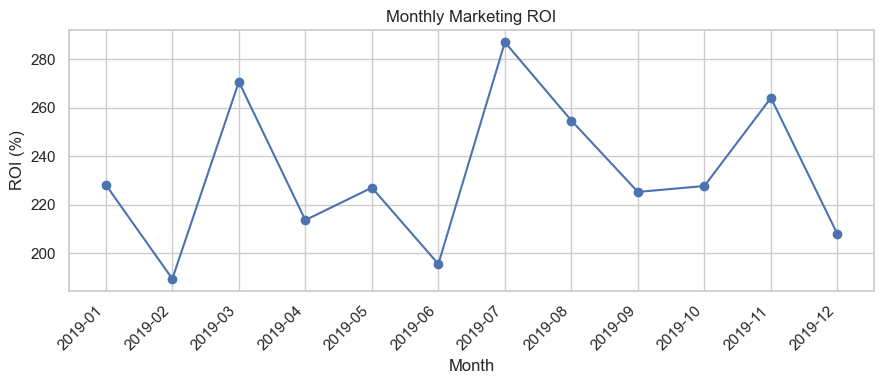

In [33]:
#visual representation of monthly marketing spend and revenue
plt.figure(figsize=(9,4))

plt.plot(
    marketing_roi["Month"].astype(str),
    marketing_roi["ROI"],
    marker="o"
)

plt.title("Monthly Marketing ROI")
plt.xlabel("Month")
plt.ylabel("ROI (%)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**9. Evaluate the effectiveness of marketing campaigns by comparing marketing spend to revenue generated. Are there opportunities to reallocate resources for better results?**

In [34]:
# Marketing spend efficiency (% of revenue)
marketing_roi["Marketing_Spend_Percent"] = (
    marketing_roi["Total_Marketing_Spend"] * 100
    / marketing_roi["Total_Revenue"]
)

# Identify high- and low-efficiency months
high_efficiency = marketing_roi.sort_values(
    "Marketing_Spend_Percent"
).head(3)

low_efficiency = marketing_roi.sort_values(
    "Marketing_Spend_Percent",
    ascending=False
).head(3)

marketing_roi, high_efficiency, low_efficiency

(      Month  Total_Revenue  Total_Marketing_Spend         ROI  \
 0   2019-01    508514.7551              154928.95  228.224489   
 1   2019-02    396865.6570              137107.92  189.454947   
 2   2019-03    453205.0673              122250.09  270.719619   
 3   2019-04    492559.7069              157026.83  213.678692   
 4   2019-05    386779.2954              118259.64  227.059422   
 5   2019-06    397002.9339              134318.14  195.569112   
 6   2019-07    465289.0189              120217.85  287.038213   
 7   2019-08    506936.6100              142904.15  254.738900   
 8   2019-09    440822.4258              135514.54  225.295297   
 9   2019-10    495627.7185              151224.65  227.742679   
 10  2019-11    586700.7202              161144.96  264.082575   
 11  2019-12    611664.9045              198648.75  207.912788   
 
     Marketing_Spend_Percent  
 0                 30.466953  
 1                 34.547691  
 2                 26.974564  
 3              

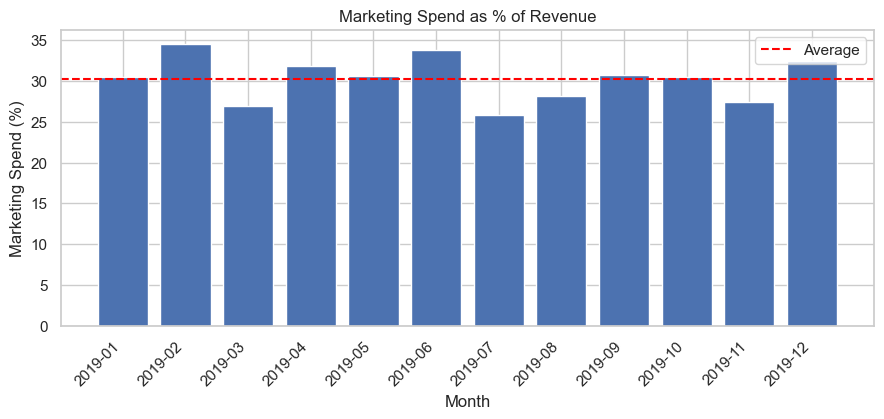

In [35]:
#visual representation of Marketing Effectiveness (Spend % of Revenue)
plt.figure(figsize=(9,4))

plt.bar(
    marketing_roi["Month"].astype(str),
    marketing_roi["Marketing_Spend_Percent"]
)

plt.axhline(
    marketing_roi["Marketing_Spend_Percent"].mean(),
    color="red",
    linestyle="--",
    label="Average"
)

plt.title("Marketing Spend as % of Revenue")
plt.xlabel("Month")
plt.ylabel("Marketing Spend (%)")
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

**10. Segment customers into groups such as Premium, Gold, Silver, and Standard. What targeted strategies can be developed for each segment to improve retention and revenue? (Use RFM segmentation techniques)**

In [36]:
# Set reference date (one day after last transaction)
reference_date = Online_Sales["Transaction_Date"].max() + pd.Timedelta(days=1)

# Compute RFM metrics per customer
rfm = (
    Online_Sales
    .groupby("CustomerID")
    .agg(
        Recency=("Transaction_Date", lambda x: (reference_date - x.max()).days),
        Frequency=("Transaction_ID", "count"),
        Monetary=("Invoice_Value", "sum")
    )
    .reset_index()
)

# Create R, F, M scores using quartiles
rfm["R_Score"] = pd.qcut(rfm["Recency"], 4, labels=[4, 3, 2, 1])
rfm["F_Score"] = pd.qcut(rfm["Frequency"], 4, labels=[1, 2, 3, 4])
rfm["M_Score"] = pd.qcut(rfm["Monetary"], 4, labels=[1, 2, 3, 4])

# Convert scores to numeric
rfm[["R_Score", "F_Score", "M_Score"]] = rfm[
    ["R_Score", "F_Score", "M_Score"]
].astype(int)

# Calculate overall RFM score
rfm["RFM_Score"] = rfm["R_Score"] + rfm["F_Score"] + rfm["M_Score"]

# Assign customer segments
rfm["Customer_Segment"] = np.select(
    [
        rfm["RFM_Score"] >= 10,
        rfm["RFM_Score"] >= 8,
        rfm["RFM_Score"] >= 6
    ],
    [
        "Premium",
        "Gold",
        "Silver"
    ],
    default="Standard"
)

rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Customer_Segment
0,12346,108,2,185.6882,3,1,1,5,Standard
1,12347,60,60,16567.9470,3,4,4,11,Premium
2,12348,74,23,1842.8708,3,3,2,8,Gold
3,12350,18,17,1636.2142,4,2,2,8,Gold
4,12356,108,36,2231.7198,3,3,3,9,Gold


In [37]:
#Segment Distribution
rfm["Customer_Segment"].value_counts()

Customer_Segment
Standard    412
Premium     393
Silver      341
Gold        322
Name: count, dtype: int64

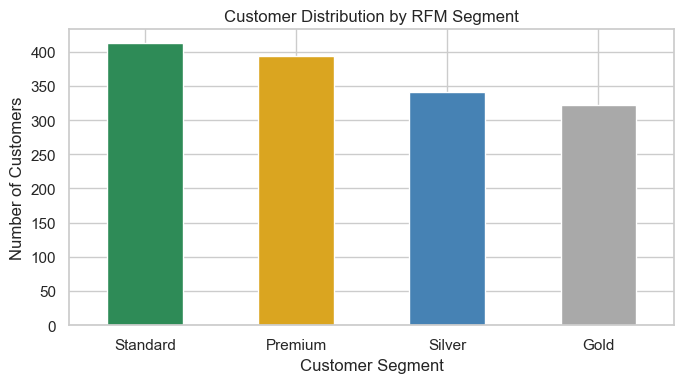

In [38]:
#Customer Segment Distribution
plt.figure(figsize=(7,4))

rfm["Customer_Segment"].value_counts().plot(
    kind="bar",
    color=["#2E8B57", "#DAA520", "#4682B4", "#A9A9A9"]
)

plt.title("Customer Distribution by RFM Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

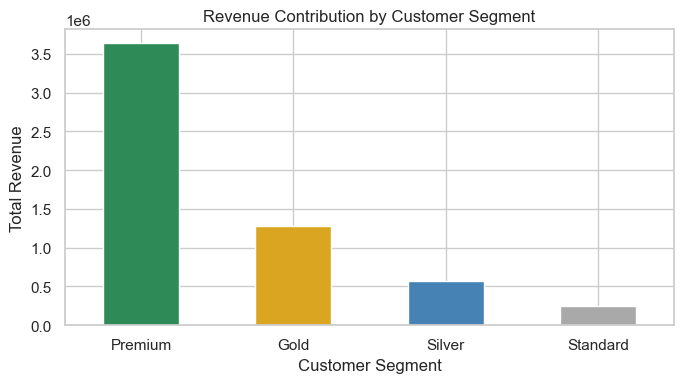

In [39]:
#Revenue Contribution by Segment
segment_revenue = (
    Online_Sales
    .merge(
        rfm[["CustomerID", "Customer_Segment"]],
        on="CustomerID",
        how="left"
    )
    .groupby("Customer_Segment")["Invoice_Value"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(7,4))

segment_revenue.plot(
    kind="bar",
    color=["#2E8B57", "#DAA520", "#4682B4", "#A9A9A9"]
)

plt.title("Revenue Contribution by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Total Revenue")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**11. Analyze the revenue contribution of each customer segment. How can the company focus its efforts on high-value segments while nurturing lower-value segments?**

In [40]:
# Merge RFM segment back to transaction data
segment_revenue = (
    Online_Sales
    .merge(
        rfm[["CustomerID", "Customer_Segment"]],
        on="CustomerID",
        how="left"
    )
    .groupby("Customer_Segment", as_index=False)
    .agg(
        Total_Revenue=("Invoice_Value", "sum"),
        Customer_Count=("CustomerID", "nunique")
    )
)

# Calculate revenue contribution %
segment_revenue["Revenue_Percent"] = (
    segment_revenue["Total_Revenue"] * 100
    / segment_revenue["Total_Revenue"].sum()
)

segment_revenue

,Customer_Segment,Total_Revenue,Customer_Count,Revenue_Percent
0,Gold,1.285979e+06,322,22.396136
1,Premium,3.635204e+06,393,63.309373
2,Silver,5.723680e+05,341,9.968148
3,Standard,2.484173e+05,412,4.326343


In [41]:
#Average revenue per customer
segment_revenue["Avg_Revenue_Per_Customer"] = (
    segment_revenue["Total_Revenue"]
    / segment_revenue["Customer_Count"]
)

segment_revenue[[
    "Customer_Segment",
    "Avg_Revenue_Per_Customer"
]]

,Customer_Segment,Avg_Revenue_Per_Customer
0,Gold,3993.724025
1,Premium,9249.884075
2,Silver,1678.498461
3,Standard,602.954517


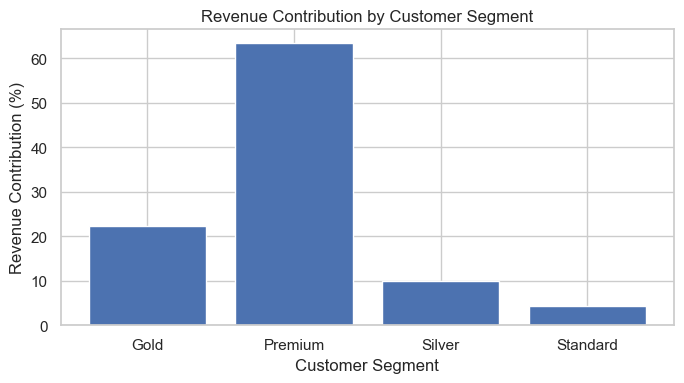

In [42]:
#Visual representation of Revenue Contribution by Segment
plt.figure(figsize=(7,4))

plt.bar(
    segment_revenue["Customer_Segment"],
    segment_revenue["Revenue_Percent"]
)

plt.title("Revenue Contribution by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Revenue Contribution (%)")
plt.tight_layout()
plt.show()

**12. Group customers by their month of first purchase and analyze retention rates over time. Which cohorts exhibit the highest and lowest retention rates? What strategies can be implemented to improve retention for weaker cohorts?**

In [43]:
#first purchase month per customer


Online_Sales["Cohort_Month"] = (
    Online_Sales
    .groupby("CustomerID")["Month"]
    .transform("min")
)

#Calculate cohort index (months since first purchase)
Online_Sales["Cohort_Index"] = (
    Online_Sales["Month"] - Online_Sales["Cohort_Month"]
).apply(lambda x: x.n)

#Build cohort data: unique customers per cohort per period
cohort_data = (
    Online_Sales
    .groupby(["Cohort_Month", "Cohort_Index"])["CustomerID"]
    .nunique()
    .reset_index()
)

#Pivot to cohort table
cohort_table = cohort_data.pivot(
    index="Cohort_Month",
    columns="Cohort_Index",
    values="CustomerID"
)

#Convert to retention rate
cohort_retention = cohort_table.divide(cohort_table[0], axis=0)

cohort_retention


Cohort_Index,0,1,2,3,4,5,6,7,8,9,10,11
Cohort_Month,,,,,,,,,,,,
2019-01,1.0,0.060465,0.111628,0.158140,0.106977,0.204651,0.162791,0.218605,0.106977,0.130233,0.093023,0.15814
2019-02,1.0,0.072917,0.093750,0.166667,0.177083,0.229167,0.197917,0.156250,0.125000,0.114583,0.166667,NaN
2019-03,1.0,0.101695,0.197740,0.141243,0.180791,0.186441,0.124294,0.124294,0.084746,0.107345,NaN,NaN
2019-04,1.0,0.085890,0.147239,0.147239,0.110429,0.092025,0.061350,0.098160,0.073620,NaN,NaN,NaN
2019-05,1.0,0.107143,0.080357,0.116071,0.089286,0.116071,0.125000,0.071429,NaN,NaN,NaN,NaN
2019-06,1.0,0.145985,0.160584,0.087591,0.080292,0.102190,0.080292,NaN,NaN,NaN,NaN,NaN
2019-07,1.0,0.138298,0.042553,0.063830,0.117021,0.095745,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,1.0,0.103704,0.111111,0.074074,0.059259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,1.0,0.076923,0.038462,0.025641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**NOTE** : NaN values appear for later cohort periods because those cohorts have not yet had sufficient time to reach those months. These values are intentionally retained to avoid misrepresenting retention.

In [44]:
# Average retention (excluding Month 0)
cohort_avg_retention = cohort_retention.iloc[:, 1:].mean(axis=1)

strongest_cohort = cohort_avg_retention.idxmax()
weakest_cohort = cohort_avg_retention.idxmin()

strongest_cohort, weakest_cohort

(Period('2019-02', 'M'), Period('2019-09', 'M'))

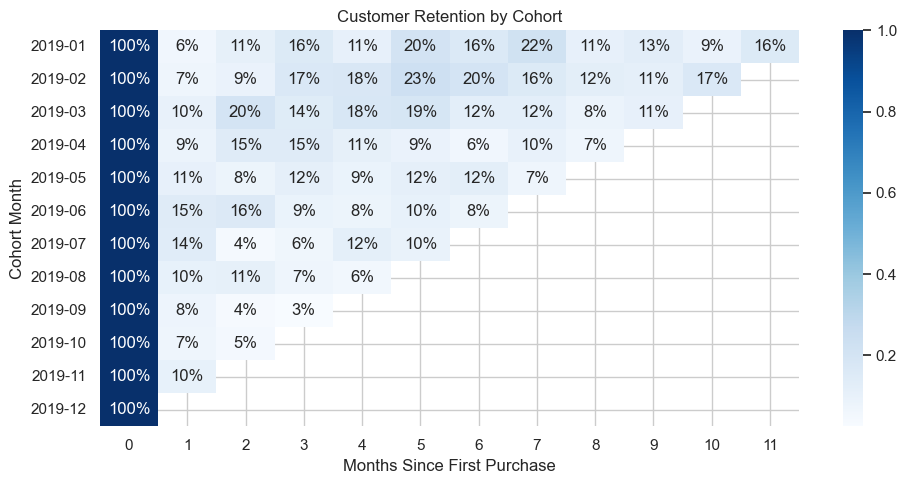

In [45]:
#visual Representation for Cohort Retention
plt.figure(figsize=(10,5))

sns.heatmap(
    cohort_retention,
    annot=True,
    fmt=".0%",
    cmap="Blues",
    mask=cohort_retention.isna()
)

plt.title("Customer Retention by Cohort")
plt.xlabel("Months Since First Purchase")
plt.ylabel("Cohort Month")
plt.tight_layout()
plt.show()

**13. Analyze the lifetime value of customers acquired in different months. How can this insight inform acquisition and retention strategies?**

In [46]:
#Ensure Month is Period type
Online_Sales["Month"] = Online_Sales["Month"].astype("period[M]")

#Identify acquisition month (first purchase month)
Online_Sales["Acquisition_Month"] = (
    Online_Sales
    .groupby("CustomerID")["Month"]
    .transform("min")
)

#Calculate total lifetime revenue per customer
customer_ltv = (
    Online_Sales
    .groupby("CustomerID", as_index=False)
    .agg(
        Lifetime_Revenue=("Invoice_Value", "sum"),
        Acquisition_Month=("Acquisition_Month", "first")
    )
)

#Calculate cohort-level LTV metrics
cohort_ltv = (
    customer_ltv
    .groupby("Acquisition_Month", as_index=False)
    .agg(
        Avg_LTV=("Lifetime_Revenue", "mean"),
        Total_LTV=("Lifetime_Revenue", "sum"),
        Customer_Count=("CustomerID", "nunique")
    )
)

cohort_ltv

,Acquisition_Month,Avg_LTV,Total_LTV,Customer_Count
0,2019-01,5997.142440,1.289386e+06,215
1,2019-02,7048.037105,6.766116e+05,96
2,2019-03,4689.368802,8.300183e+05,177
3,2019-04,3368.329990,5.490378e+05,163
4,2019-05,3672.472798,4.113170e+05,112
5,2019-06,2630.135053,3.603285e+05,137
6,2019-07,3092.132704,2.906605e+05,94
7,2019-08,2378.746658,3.211308e+05,135
8,2019-09,2395.153615,1.868220e+05,78
9,2019-10,3218.040777,2.799695e+05,87


In [47]:
#Identify Highest & Lowest LTV Cohorts
highest_ltv_month = cohort_ltv.loc[
    cohort_ltv["Avg_LTV"].idxmax(), "Acquisition_Month"
]

lowest_ltv_month = cohort_ltv.loc[
    cohort_ltv["Avg_LTV"].idxmin(), "Acquisition_Month"
]

highest_ltv_month, lowest_ltv_month

(Period('2019-02', 'M'), Period('2019-08', 'M'))

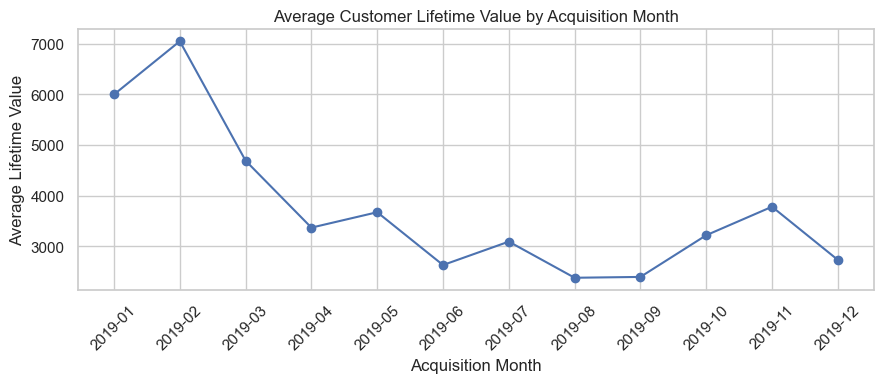

In [48]:
#Visualization for Average LTV by Acquisition
plt.figure(figsize=(9,4))

plt.plot(
    cohort_ltv["Acquisition_Month"].astype(str),
    cohort_ltv["Avg_LTV"],
    marker="o"
)

plt.title("Average Customer Lifetime Value by Acquisition Month")
plt.xlabel("Acquisition Month")
plt.ylabel("Average Lifetime Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**14. Identify seasonal trends in sales by category and location. How can the company prepare for peak and off-peak seasons to maximize revenue?**

In [49]:
#Month grouping
Online_Sales["Month"] = Online_Sales["Month"].astype("period[M]")

#Monthly revenue by Product Category
category_seasonality = (
    Online_Sales
    .groupby(["Month", "Product_Category"], as_index=False)
    .agg(Total_Revenue=("Invoice_Value", "sum"))
)

#Monthly revenue by Location
location_seasonality = (
    Online_Sales
    .groupby(["Month", "Location"], as_index=False)
    .agg(Total_Revenue=("Invoice_Value", "sum"))
)

category_seasonality.head(), location_seasonality.head()

(     Month Product_Category  Total_Revenue
 0  2019-01      accessories        63.2270
 1  2019-01          android       107.6640
 2  2019-01          apparel     60725.2166
 3  2019-01        backpacks       336.0290
 4  2019-01             bags     15928.8534,
      Month       Location  Total_Revenue
 0  2019-01     California    193002.9813
 1  2019-01        Chicago    134915.9864
 2  2019-01     New Jersey     38876.1130
 3  2019-01       New York     99363.3995
 4  2019-01  Washington DC     42356.2749)

**15. Analyze daily sales trends to identify high-performing and low-performing days. What strategies can be implemented to boost sales on slower days?**

In [50]:
#Ensure Transaction_Date is datetime
Online_Sales["Transaction_Date"] = pd.to_datetime(
    Online_Sales["Transaction_Date"]
)

#Aggregate daily sales metrics
daily_sales = (
    Online_Sales
    .groupby("Transaction_Date", as_index=False)
    .agg(
        Daily_Revenue=("Invoice_Value", "sum"),
        Order_Count=("Transaction_ID", "nunique")
    )
)

#Add day of week
daily_sales["Day_of_Week"] = daily_sales["Transaction_Date"].dt.day_name()

#Average performance by day of week
weekday_performance = (
    daily_sales
    .groupby("Day_of_Week", as_index=False)
    .agg(
        Avg_Revenue=("Daily_Revenue", "mean"),
        Avg_Orders=("Order_Count", "mean")
    )
)

#Order days correctly
weekday_order = [
    "Monday", "Tuesday", "Wednesday",
    "Thursday", "Friday", "Saturday", "Sunday"
]

weekday_performance["Day_of_Week"] = pd.Categorical(
    weekday_performance["Day_of_Week"],
    categories=weekday_order,
    ordered=True
)

weekday_performance = weekday_performance.sort_values("Day_of_Week")

weekday_performance

,Day_of_Week,Avg_Revenue,Avg_Orders
1,Monday,8446.572608,40.961538
5,Tuesday,9033.659791,43.679245
6,Wednesday,19574.961096,84.192308
4,Thursday,19811.596279,82.269231
0,Friday,20522.353740,81.403846
2,Saturday,16163.950881,74.461538
3,Sunday,16695.658562,74.134615


In [51]:
#High- & Low-Performing Days
best_day = weekday_performance.loc[
    weekday_performance["Avg_Revenue"].idxmax()
]

worst_day = weekday_performance.loc[
    weekday_performance["Avg_Revenue"].idxmin()
]

best_day, worst_day

(Day_of_Week         Friday
 Avg_Revenue    20522.35374
 Avg_Orders       81.403846
 Name: 0, dtype: object,
 Day_of_Week         Monday
 Avg_Revenue    8446.572608
 Avg_Orders       40.961538
 Name: 1, dtype: object)

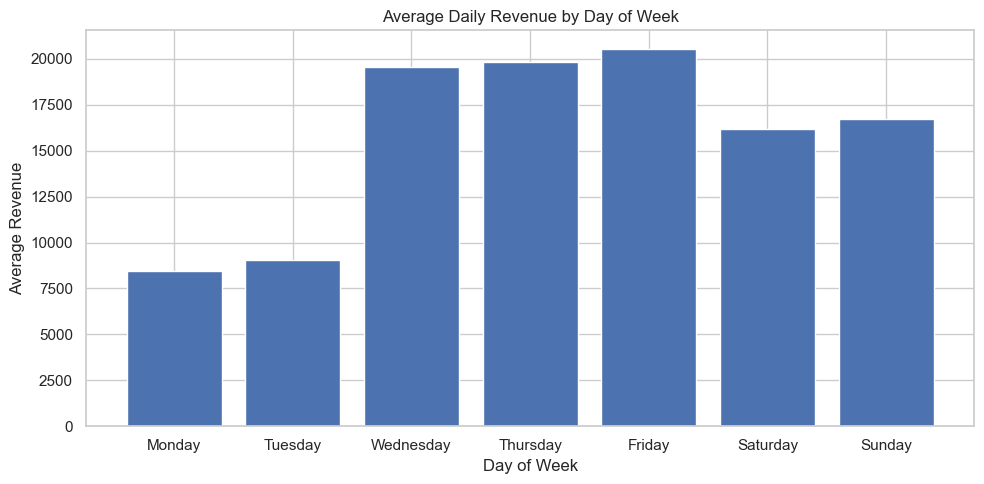

In [52]:
#Average Revenue by Day of Week
plt.figure(figsize=(10,5))

plt.bar(
    weekday_performance["Day_of_Week"],
    weekday_performance["Avg_Revenue"]
)

plt.title("Average Daily Revenue by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Revenue")
plt.tight_layout()
plt.show()

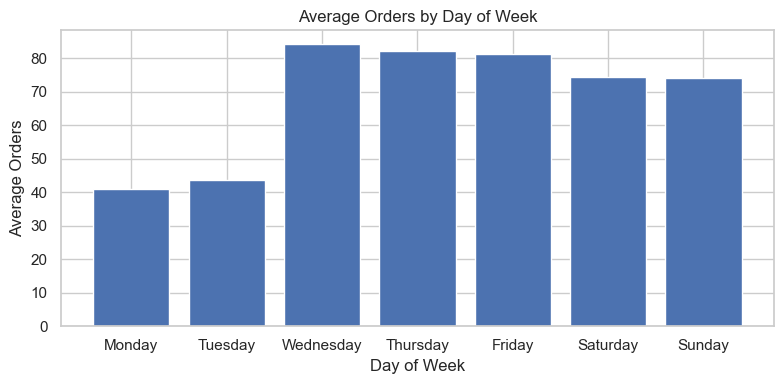

In [53]:
#Order Volume by Day of Week
plt.figure(figsize=(8,4))

plt.bar(
    weekday_performance["Day_of_Week"],
    weekday_performance["Avg_Orders"]
)

plt.title("Average Orders by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Orders")
plt.tight_layout()
plt.show()

**Overall Insights**

The analysis revealed several important patterns:

Customer acquisition fluctuates across months, indicating seasonal demand and varying marketing effectiveness.

Retention rates vary significantly by month, with certain periods showing stronger repeat customer behavior.

Existing customers contribute a substantial portion of total revenue, highlighting the importance of retention alongside acquisition.

Coupon usage increases order volume but does not always lead to higher average transaction value, suggesting the need for controlled discount strategies.

Marketing spend does not always translate directly into higher revenue, indicating uneven marketing efficiency across months.

A small segment of high-value customers contributes a disproportionately large share of revenue.

Certain products consistently perform well in both quantity sold and revenue, pointing to strong product-market fit.

Sales show clear seasonal trends across categories and locations, impacting inventory and promotional needs.

**Business Recommendations:**

Based on the findings, the following recommendations are proposed:

**Strengthen Retention Programs:** Focus on loyalty programs, personalized offers, and post-purchase engagement during months with weaker retention.

**Optimize Discount Strategies:** Use targeted discounts for price-sensitive customers instead of blanket coupon campaigns to protect profitability.

**Improve Marketing ROI:** Reallocate marketing budgets toward months and channels with higher return on investment while reducing spend in low-efficiency periods.

**Leverage High-Value Customers:** Develop exclusive benefits and early access offers for premium and high-value customer segments to maximize lifetime value.

**Inventory Planning:** Increase stock availability for consistently high-performing products and categories, especially during peak seasons.

**Seasonal Campaign Planning:** Align promotions and inventory with seasonal demand patterns to maximize revenue during high-traffic periods.

**Data-Driven Decision Making:** Continuously monitor customer cohorts, retention metrics, and marketing efficiency to adapt strategies proactively.

Overall, this analysis highlights the importance of adopting a balanced strategy that combines effective customer acquisition with strong retention efforts. While marketing initiatives play a critical role in driving traffic and sales, long-term growth is largely supported by repeat customers and high-value segments. By leveraging data-driven insights on customer behavior, product performance, and seasonal demand, the business can optimize marketing investments, enhance customer engagement, and improve operational efficiency. Implementing these recommendations will enable the organization to achieve sustainable revenue growth while maintaining profitability in a competitive e-commerce environment.